# Prediction using Unsupervised ML

# Sameer Dhole

In [75]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition

iris =datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# SOLUTION  AFTER APPLYING PRINCIPAL COMPONENT ANALYSIS ON IRIS DATASET

In [76]:
X = iris.data[:, :-1]
y = iris.target

In [77]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

Text(0, 0.5, 'Sepal Width')

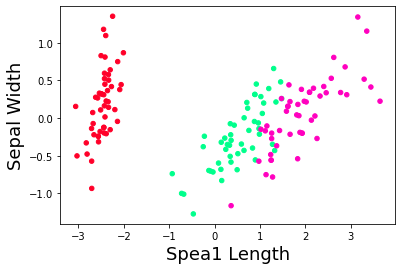

In [87]:
plt.scatter(X[:,0], X[:,1],s=20, c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


In [79]:
#plt.scatter(X[:,2], X[:,3], c=y, cmap='gist_rainbow')
#plt.xlabel('Petal Length', fontsize=18)
#plt.ylabel('Petal Width', fontsize=18)

In [80]:
km = KMeans(n_clusters = 3,  random_state=21)
y_kmeans = km.fit_predict(X)
np.ndim(y_kmeans)

1

In [81]:
centers = km.cluster_centers_
print(centers)

[[ 0.58592861 -0.35914952]
 [-2.46415655  0.19510179]
 [ 2.12438019  0.26370435]]


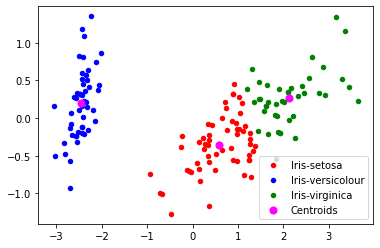

In [89]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 20, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 20, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 50, c = 'magenta', label = 'Centroids')

plt.legend()

In [73]:
#plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
#           s = 100, c = 'red', label = 'Iris-setosa')
#plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
#            s = 100, c = 'blue', label = 'Iris-versicolour')
#plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
#            s = 100, c = 'green', label = 'Iris-virginica')
#
# Plotting the centroids of the clusters
#plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], 
#            s = 100, c = 'yellow', label = 'Centroids')
#
#plt.legend()

# SOLUTION WITHOUT PRINCIPAL COMPONENT ANALYSIS

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

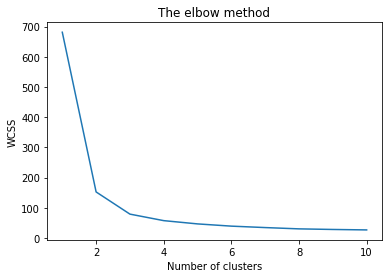

In [91]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [92]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

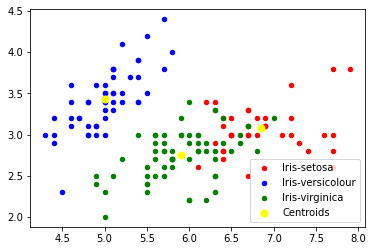

In [94]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 20, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 20, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

ABOVE YOU CAN SEE THAT WITH PCA WE FIND CLEARLY SEGREGATION OF CLUSTERS BUT WITHOUT PCA WE HAVE OVERLAPPING BOUNDARIES 